# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [2]:
# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

In [3]:
# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Data Understanding

In [4]:
import pandas as pd

# Membaca file CSV dengan enkode ISO-8859-1 (Latin-1)
data = pd.read_csv('/content/190623_rumahcom_tangsel_city_unfiltered.csv', encoding='ISO-8859-1')

# Menampilkan data
data


,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


In [5]:
data.shape #mengetahui ukuran data


(29420, 7)

In [6]:
data.columns

Index(['nav-link href', 'listing-location', 'price', 'bed', 'bath',
       'listing-floorarea', 'listing-floorarea 2'],
      dtype='object')

In [7]:
data.dtypes

nav-link href           object
listing-location        object
price                   object
bed                    float64
bath                   float64
listing-floorarea       object
listing-floorarea 2     object
dtype: object

In [8]:
data.isnull().sum()


nav-link href            0
listing-location         0
price                    0
bed                    138
bath                   205
listing-floorarea        0
listing-floorarea 2     37
dtype: int64

In [9]:
data.isnull().mean() * 100

nav-link href          0.000000
listing-location       0.000000
price                  0.000000
bed                    0.469069
bath                   0.696805
listing-floorarea      0.000000
listing-floorarea 2    0.125765
dtype: float64

*missing value* terbanyak ada di bath = 67.4%, dan bed= 45.4%

In [10]:
missing_values = data.isnull().sum()
subset_columns = ['bed', 'bath', 'listing-floorarea 2']
non_missing_counts = data[subset_columns].count()

print("Missing values:", missing_values[subset_columns])
print("Non missing values:", non_missing_counts)


Missing values: bed                    138
bath                   205
listing-floorarea 2     37
dtype: int64
Non missing values: bed                    29282
bath                   29215
listing-floorarea 2    29383
dtype: int64


In [11]:
print(data.duplicated().value_counts())

False    24179
True      5241
dtype: int64


- 24179 : data tidak duplikat
- 5241 data duplikat

In [12]:
print("Jumlah data awal: ",data.shape)


Jumlah data awal:  (29420, 7)


In [13]:
# make a copy of a data frame
df = data.copy()

Berdasarkan data understanding informasi diperoleh :
- Data berjumlah 29420 baris dan 7 kolom
- Terdapat missing value pada bed (46.9%), bath (69.6%), dan area price meter atau listing-floor area 2  (12.5%)
- Duplikat data 5241, dan data tidak duplikat 24179
- Type data object dan float .  

In [14]:
# Menghitung koefisien korelasi
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
kendall_corr = df.corr(method='kendall')

# Menggabungkan koefisien korelasi ke dalam satu DataFrame
correlation_df = pd.concat([pearson_corr, spearman_corr, kendall_corr], axis=1, keys=['Pearson', 'Spearman', 'Kendall'])

# Mencetak hasil
print(correlation_df)


       Pearson            Spearman             Kendall          
           bed      bath       bed      bath       bed      bath
bed   1.000000  0.799451  1.000000  0.810829  1.000000  0.730314
bath  0.799451  1.000000  0.810829  1.000000  0.730314  1.000000


<ipython-input-14-561aec2d746f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df.corr(method='pearson')
<ipython-input-14-561aec2d746f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')
<ipython-input-14-561aec2d746f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendall_corr = df.corr(method='kendall')


# Data Preprocessing

Proses yang dilakukan
- Rename kolom
- Menghapus kolom link
- Mengubah tipe data object ke numerik
- Menghapus data duplikat
- Memperbaiki missing value


In [15]:
# Membaca file CSV dengan enkode ISO-8859-1 (Latin-1)
data = pd.read_csv('/content/190623_rumahcom_tangsel_city_unfiltered.csv', encoding='ISO-8859-1')


# Rename columns
df = df.rename(columns={
    'nav-link href': 'link',
    'listing-location': 'location',
    'price': 'price',
    'bed': 'bed',
    'bath': 'bath',
    'listing-floorarea': 'area',
    'listing-floorarea 2': 'area_price_meter'
})

df

,link,location,price,bed,bath,area,area_price_meter
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


In [16]:
df.columns

Index(['link', 'location', 'price', 'bed', 'bath', 'area', 'area_price_meter'], dtype='object')

In [17]:
df.dtypes

link                 object
location             object
price                object
bed                 float64
bath                float64
area                 object
area_price_meter     object
dtype: object

In [18]:
df=df.drop(['link'], axis=1)
df

,location,price,bed,bath,area,area_price_meter
0,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...
29415,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


### Mengubah Tipe Data Manual + Encoder

In [19]:
# Mengubah data menjadi numerik
# Mengubah kolom 'price' menjadi nominal Rupiah dalam angka
df['price'] = df['price'].str.replace(' M', '000000').str.replace(',', '', regex=True).str.replace('[^\d]', '', regex=True).astype(float)

# Menghilangkan " m²" dari kolom 'listing-floorarea'
df['area'] = df['area'].str.replace(' m²', '', regex=True).astype(int)

# Mengubah kolom 'listing-floorarea 2' menjadi nominal Rupiah dalam angka
df['area_price_meter'] = df['area_price_meter'].str.replace('Rp ', '', regex=True).str.replace(',', '', regex=True).str.replace('[^\d]', '', regex=True).astype(float)

# Menampilkan data setelah transformasi
df


,location,price,bed,bath,area,area_price_meter
0,"Gading Serpong, Tangerang Selatan, Banten",69000000.0,5.0,5.0,420,20720721.0
1,"Gading Serpong, Tangerang Selatan, Banten",45000000.0,3.0,3.0,190,12747875.0
2,"Gading Serpong, Tangerang Selatan, Banten",395000000.0,3.0,3.0,132,30859375.0
3,"Gading Serpong, Tangerang Selatan, Banten",33000000.0,4.0,3.0,220,18333333.0
4,"Gading Serpong, Tangerang Selatan, Banten",35000000.0,3.0,2.0,180,27777778.0
...,...,...,...,...,...,...
29415,"Bintaro, Tangerang Selatan, Banten",33000000.0,3.0,3.0,300,21710526.0
29416,"Bintaro, Tangerang Selatan, Banten",4000000.0,8.0,4.0,330,36363636.0
29417,"Bintaro, Tangerang Selatan, Banten",22000000.0,3.0,2.0,160,18333333.0
29418,"Bintaro, Tangerang Selatan, Banten",195000000.0,3.0,2.0,120,21666667.0


In [20]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Loop melalui kolom-kolom yang ingin diubah
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Menampilkan data setelah transformasi
df


,location,price,bed,bath,area,area_price_meter
0,1836,69000000.0,5.0,5.0,420,20720721.0
1,1836,45000000.0,3.0,3.0,190,12747875.0
2,1836,395000000.0,3.0,3.0,132,30859375.0
3,1836,33000000.0,4.0,3.0,220,18333333.0
4,1836,35000000.0,3.0,2.0,180,27777778.0
...,...,...,...,...,...,...
29415,595,33000000.0,3.0,3.0,300,21710526.0
29416,595,4000000.0,8.0,4.0,330,36363636.0
29417,595,22000000.0,3.0,2.0,160,18333333.0
29418,595,195000000.0,3.0,2.0,120,21666667.0


### Mengubah Tipe Data Encode

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Membaca file CSV dengan enkode ISO-8859-1 (Latin-1)
data = pd.read_csv('/content/190623_rumahcom_tangsel_city_unfiltered.csv', encoding='ISO-8859-1')
data=data.drop(['nav-link href'], axis=1)

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Loop melalui kolom-kolom yang ingin diubah
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Menampilkan data setelah transformasi
data


,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,1836,1585,5.0,5.0,340,2638
1,1836,1255,3.0,3.0,111,795
2,1836,1145,3.0,3.0,49,4150
3,1836,1067,4.0,3.0,145,2137
4,1836,1094,3.0,2.0,100,3805
...,...,...,...,...,...,...
29415,595,1067,3.0,3.0,234,2819
29416,595,1222,8.0,4.0,266,4527
29417,595,708,3.0,2.0,79,2137
29418,595,499,3.0,2.0,32,2812


## Percobaan 1

In [22]:
# Menghapus Duplikat Data
#df.drop_duplicates(keep='first', inplace=True)
print("Jumlah data terbaru: ", df.shape)
print("Jumlah data awal: ",data.shape)

Jumlah data terbaru:  (29420, 6)
Jumlah data awal:  (29420, 6)


**Missing value:**
- 'bed': 138 missing values
- 'bath': 205 missing values
- 'listing-floorarea 2': 37 missing values

Jumlah total data dalam Tentu, berikut adalah teks tanpa rumus matematika dalam format yang lebih sederhana:

Jumlah total data dalam setiap kolom adalah 29,420.

Karena jumlah missing value relatif kecil, maka biasanya disarankan untuk mengisi missing value daripada menghapusnya.

In [23]:
df.columns

Index(['location', 'price', 'bed', 'bath', 'area', 'area_price_meter'], dtype='object')

In [24]:
#Memperbaiki missing value

# Menghitung nilai rata-rata (mean) dari kolom
mean_bed = df['bed'].mean()
mean_bath = df['bath'].mean()
mean_area_price_meter = df['area_price_meter'].mean()

# Mengisi missing values dalam kolom dengan nilai mean
df['bed'].fillna(mean_bed, inplace=True)
df['bath'].fillna(mean_bath, inplace=True)
df['area_price_meter'].fillna(mean_area_price_meter, inplace=True)

#Menampilkan mean dari setiap kolom yang akan diisi
print("Mean Bed:", mean_bed)
print("Mean Bath:", mean_bath)
print("Mean area_price_meter:", mean_area_price_meter)




Mean Bed: 3.7544566627962572
Mean Bath: 2.9861372582577443
Mean area_price_meter: 31911284.981077492


In [25]:
# Menampilkan data setelah mengisi missing values
df


,location,price,bed,bath,area,area_price_meter
0,1836,69000000.0,5.0,5.0,420,20720721.0
1,1836,45000000.0,3.0,3.0,190,12747875.0
2,1836,395000000.0,3.0,3.0,132,30859375.0
3,1836,33000000.0,4.0,3.0,220,18333333.0
4,1836,35000000.0,3.0,2.0,180,27777778.0
...,...,...,...,...,...,...
29415,595,33000000.0,3.0,3.0,300,21710526.0
29416,595,4000000.0,8.0,4.0,330,36363636.0
29417,595,22000000.0,3.0,2.0,160,18333333.0
29418,595,195000000.0,3.0,2.0,120,21666667.0


In [26]:
df.isnull().mean() * 100

location            0.0
price               0.0
bed                 0.0
bath                0.0
area                0.0
area_price_meter    0.0
dtype: float64

##Exploratory Data Analysis (EDA)

In [27]:
df.describe()

,location,price,bed,bath,area,area_price_meter
count,29420.000000,2.942000e+04,29420.000000,29420.000000,29420.000000,2.942000e+04
mean,3144.557954,2.721315e+13,3.754457,2.986137,220.566893,3.191128e+07
std,2741.065887,8.716020e+14,1.353576,1.355042,3395.765796,5.007242e+08
min,0.000000,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00
25%,595.000000,1.200000e+07,3.000000,2.000000,80.000000,1.316821e+07
50%,1959.000000,3.300000e+07,4.000000,3.000000,140.000000,1.833333e+07
75%,6000.000000,1.430000e+08,4.000000,4.000000,236.000000,2.424242e+07
max,8494.000000,1.350000e+17,10.000000,10.000000,400000.000000,2.937500e+10


Axes(0.125,0.11;0.775x0.77)


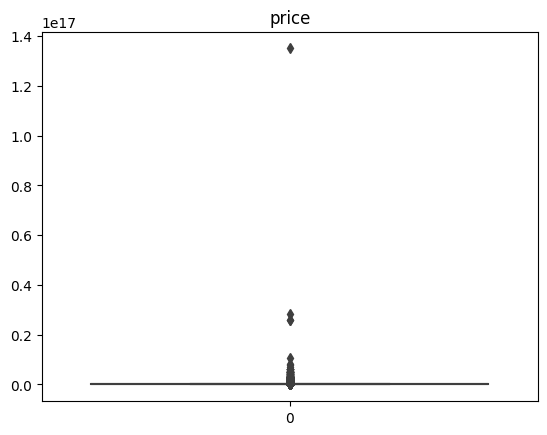

In [28]:
#Membuat Boxplot (contoh pada data price)
plt.title("price")
print(sns.boxplot(df['price']))

Artinya karena data terlalu besar, hingga box-plot tidak terliha sehingga hanya outliers yang terlihat

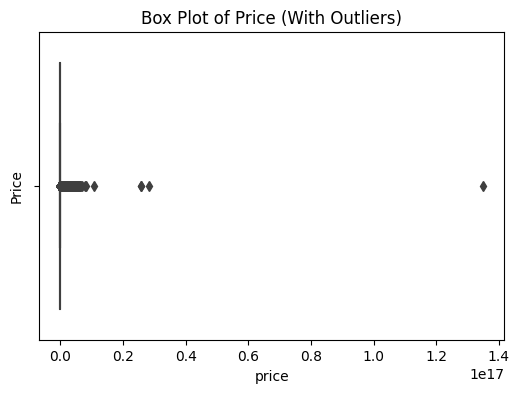

In [29]:
# Membuat boxplot untuk kolom 'price' dan menampilkan outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], showfliers=True)  # Menampilkan outlier
plt.title("Box Plot of Price (With Outliers)")
plt.ylabel("Price")

plt.show()

In [30]:

# Menghitung Q1, Q3, dan IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# Menghitung batas atas dan batas bawah untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mengidentifikasi outlier
outliers = df[(data['price'] < lower_bound) | (df['price'] > upper_bound)]

# Menampilkan outlier
print("Outliers in 'price':")
print(outliers['price'])


Outliers in 'price':
2        3.950000e+08
10       2.732000e+09
30       3.850000e+08
41       3.850000e+08
45       2.495000e+09
             ...     
29388    1.296000e+09
29393    1.195000e+09
29406    3.750000e+08
29412    4.744800e+10
29413    4.744700e+10
Name: price, Length: 3774, dtype: float64


array([[<Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'area_price_meter'}>]], dtype=object)

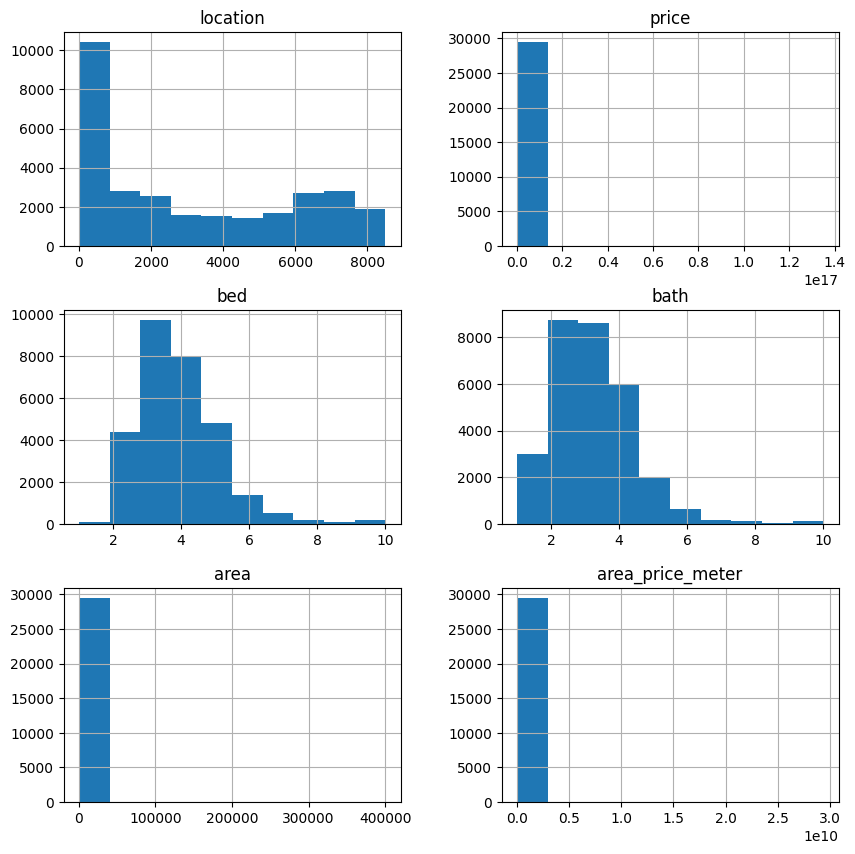

In [31]:
#buat plot hist untuk masing masing kolom
df.hist(figsize=(10,10))

#Multivariate Exploratory Data Analysis

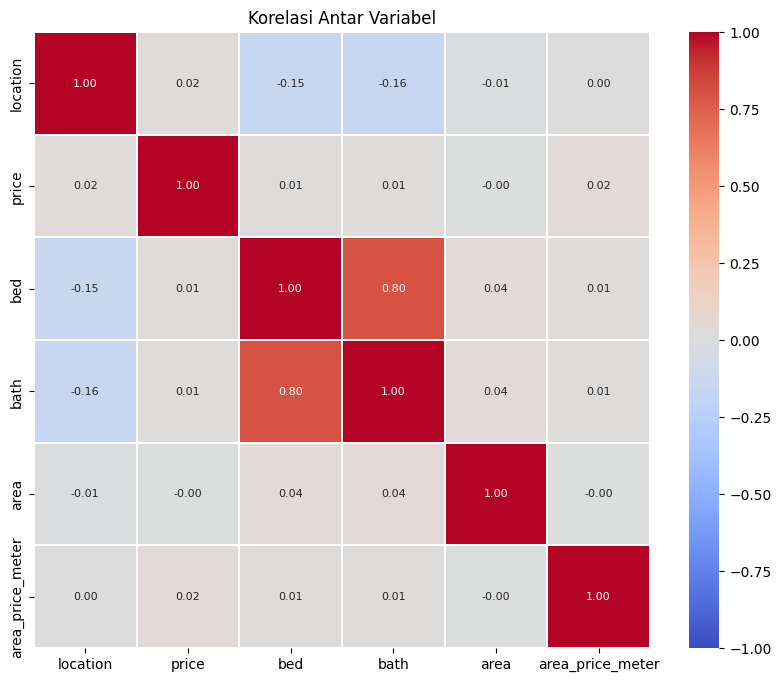

In [32]:
# Fungsi Heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

Semakin nilai korelasi mendekati 0 menandakan bahwa tidak ada korelasi antara variabel independen dengan price. Sehingga lebih baik dihapus saja.

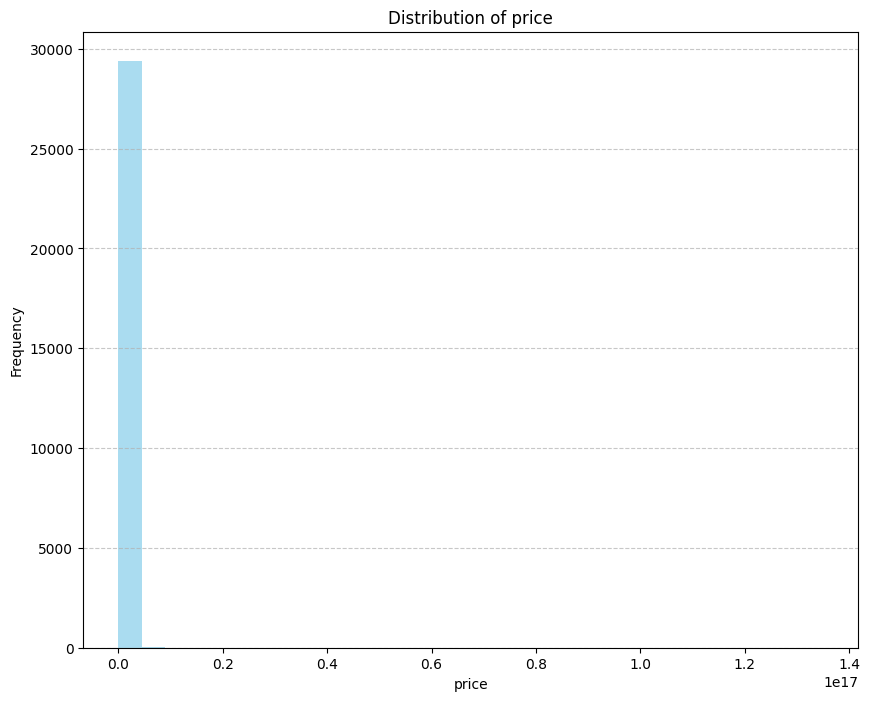

In [33]:
# Memilih kolom yang ingin Anda analisis (contoh: 'price')
selected_column = 'price'

# Membuat histogram untuk melihat persebaran data
plt.figure(figsize=(10, 8))
plt.hist(df[selected_column], bins=30, color='skyblue', alpha=0.7)
plt.title(f'Distribution of {selected_column}')
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Modelling Data

In [34]:
!pip install tensorflow


In [35]:
!pip install torch


In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
from keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [37]:
dfn=df

In [38]:
data.columns

Index(['listing-location', 'price', 'bed', 'bath', 'listing-floorarea',
       'listing-floorarea 2'],
      dtype='object')

## Percobaan 1

Layers LSTM dalam mode Bidirectional
Hidden Layer 64, 128, 1
Fungsi aktivasi LSTM = tanh
Fungsi aktivasi lapisan Dense =Relu layer pertama dan sigmoid yang kedua
Optimizer = Adam
Metrik = Accuracy
Epoch = 5
Batch size =
Regularisasi = L2 pada layer LSTM dengan kernel-regularizer=12


In [39]:
df

,location,price,bed,bath,area,area_price_meter
0,1836,69000000.0,5.0,5.0,420,20720721.0
1,1836,45000000.0,3.0,3.0,190,12747875.0
2,1836,395000000.0,3.0,3.0,132,30859375.0
3,1836,33000000.0,4.0,3.0,220,18333333.0
4,1836,35000000.0,3.0,2.0,180,27777778.0
...,...,...,...,...,...,...
29415,595,33000000.0,3.0,3.0,300,21710526.0
29416,595,4000000.0,8.0,4.0,330,36363636.0
29417,595,22000000.0,3.0,2.0,160,18333333.0
29418,595,195000000.0,3.0,2.0,120,21666667.0


In [40]:
df=df.drop(['area_price_meter'], axis=1)


In [41]:
df.head()

,location,price,bed,bath,area
0,1836,69000000.0,5.0,5.0,420
1,1836,45000000.0,3.0,3.0,190
2,1836,395000000.0,3.0,3.0,132
3,1836,33000000.0,4.0,3.0,220
4,1836,35000000.0,3.0,2.0,180


In [42]:
dfn=df

In [43]:
from sklearn.preprocessing import StandardScaler

# Gabungkan data_normal dan data_attack
X_normal = dfn[['bed', 'bath', 'area']].values
X_attack = dfn[['bed', 'bath', 'area']].values
Y_normal = dfn['price'].values
Y_attack = dfn['price'].values

X = np.concatenate((X_normal, X_attack))
Y = np.concatenate((Y_normal, Y_attack))

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [44]:
for i in range(0,len(Y)):
  if Y[i] =="price":
    Y[i]=0
  else:
    Y[i]=1


In [45]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [46]:
X.shape


(58840, 3)

# Loss : Binary dan Metriknya : Akurasi

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Gabungkan data_normal dan data_attack
X_normal = dfn[['bed', 'bath', 'area']].values
X_attack = dfn[['bed', 'bath', 'area']].values
Y_normal = dfn['price'].values
Y_attack = dfn['price'].values

X = np.concatenate((X_normal, X_attack))
Y = np.concatenate((Y_normal, Y_attack))

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

for i in range(0, len(Y)):
    if Y[i] == "price":
        Y[i] = 0
    else:
        Y[i] = 1

features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j - i] = X[j]
    I[i] = temp

X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size=0.2)

def create_baseline():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))  # kernel ini memperkecil ukuran data (reduksi), (min, max, mean)
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_baseline()
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
1177/1177 [==============================] - 23s 16ms/step - loss: 0.0850 - accuracy: 0.9988 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 2/10
1177/1177 [==============================] - 18s 15ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 3/10
1177/1177 [==============================] - 18s 15ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/10
1177/1177 [==============================] - 18s 16ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/10
1177/1177 [==============================] - 18s 15ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
1177/1177 [==============================] - 19s 16ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/10
1177/1177 [==============================] - 17s 15ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0018 -

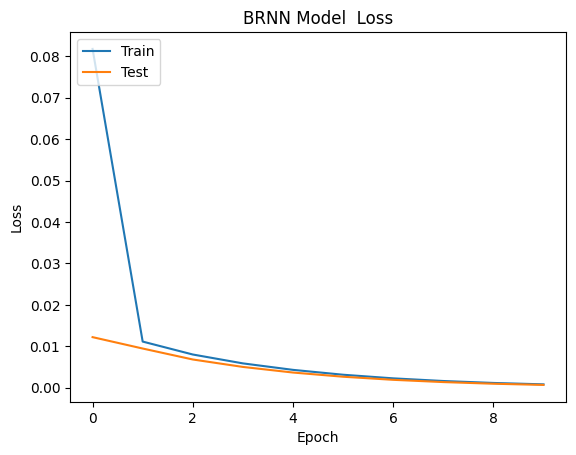

In [51]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss Binary')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss Binary.png')
plt.show()

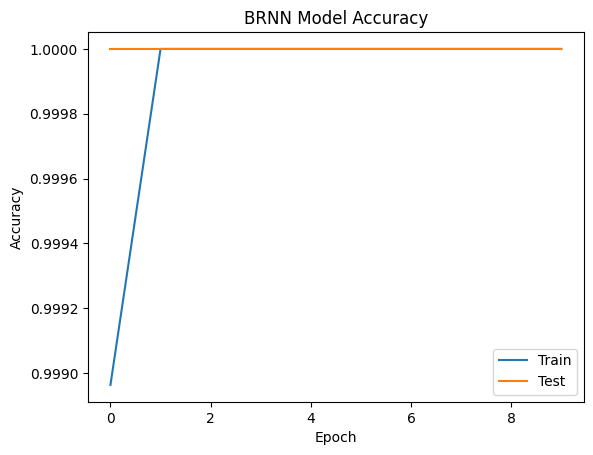

In [52]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])  # Ubah 'acc' ke 'accuracy'
plt.plot(history.history['val_accuracy'])  # Ubah 'val_acc' ke 'val_accuracy'
plt.title('BRNN Model Accuracy Binary')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')  # Sesuaikan lokasi legenda
plt.savefig('BRNN_Model_Accuracy Binary.png')
plt.show()


In [53]:
!pip install setuptools==65.5.0 "wheel<0.40.0"


# Loss : MSE dan Akurasi : MSE

In [67]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Gabungkan data_normal dan data_attack
X_normal = dfn[['bed', 'bath', 'area']].values
X_attack = dfn[['bed', 'bath', 'area']].values
Y_normal = dfn['price'].values
Y_attack = dfn['price'].values

X = np.concatenate((X_normal, X_attack))
Y = np.concatenate((Y_normal, Y_attack))

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

for i in range(0, len(Y)):
    if Y[i] == "price":
        Y[i] = 0
    else:
        Y[i] = 1

features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j - i] = X[j]
    I[i] = temp

X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size=0.2)

def create_baseline():
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

model = create_baseline()
history1 = model.fit(X_train, Y_train, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
1177/1177 [==============================] - 29s 20ms/step - loss: 0.0650 - mean_squared_error: 0.0042 - val_loss: 0.0055 - val_mean_squared_error: 7.8308e-04
Epoch 2/10
1177/1177 [==============================] - 25s 21ms/step - loss: 0.0043 - mean_squared_error: 6.7281e-04 - val_loss: 0.0033 - val_mean_squared_error: 5.7296e-04
Epoch 3/10
1177/1177 [==============================] - 22s 18ms/step - loss: 0.0027 - mean_squared_error: 4.9024e-04 - val_loss: 0.0021 - val_mean_squared_error: 4.1492e-04
Epoch 4/10
1177/1177 [==============================] - 19s 16ms/step - loss: 0.0018 - mean_squared_error: 3.5426e-04 - val_loss: 0.0014 - val_mean_squared_error: 2.9989e-04
Epoch 5/10
1177/1177 [==============================] - 28s 24ms/step - loss: 0.0012 - mean_squared_error: 2.5660e-04 - val_loss: 9.8802e-04 - val_mean_squared_error: 2.1777e-04
Epoch 6/10
1177/1177 [==============================] - 20s 17ms/step - loss: 8.2457e-04 - mean_squared_error: 1.8668e-04 - val_lo

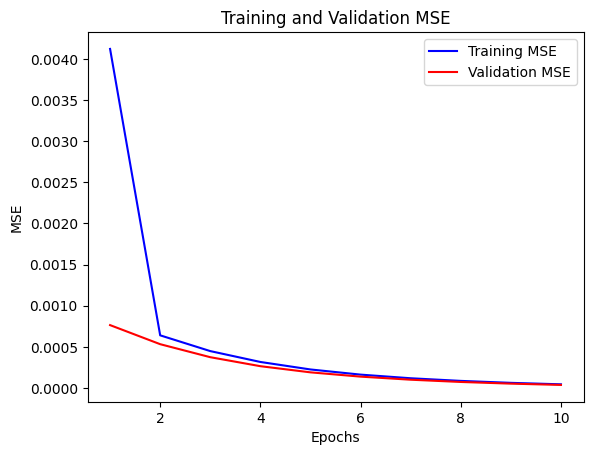

In [69]:
import matplotlib.pyplot as plt

# Ambil nilai MSE dari objek history
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

# Ambil jumlah epoch
epochs = range(1, len(mse) + 1)

# Visualisasi MSE pada setiap epoch
plt.plot(epochs, mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


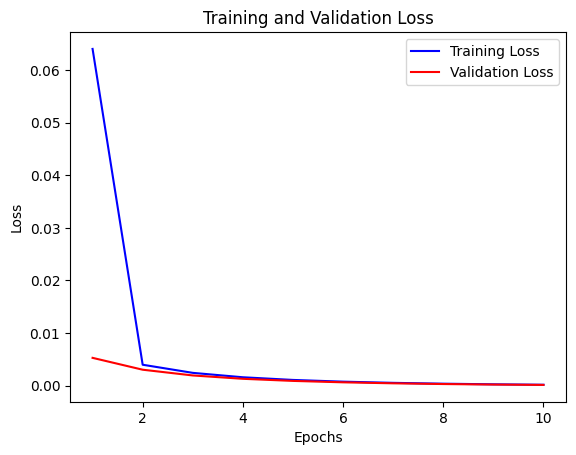

In [70]:

# Ambil nilai loss dari objek history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ambil jumlah epoch
epochs = range(1, len(loss) + 1)

# Visualisasi Loss pada setiap epoch
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#DTree

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assume X dan Y telah dipersiapkan sebelumnya

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
dtree_model = DecisionTreeRegressor(random_state=42)
dtree_model.fit(X_train, Y_train)

# Prediksi pada data test
Y_pred_dtree = dtree_model.predict(X_test)

# Evaluasi menggunakan MSE
mse_dtree = mean_squared_error(Y_test, Y_pred_dtree)
print(f'Mean Squared Error (Decision Tree): {mse_dtree}')


Mean Squared Error (Decision Tree): 0.0


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Membuat dan melatih model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

# Prediksi pada data test
Y_pred_rf = rf_model.predict(X_test)

# Evaluasi menggunakan MSE
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')


Mean Squared Error (Random Forest): 0.0


# Kesimpulan



## Metrik Binary

## Metrik MSE

Hasil dari MSE
* contonya kita ambil 3 saja
Epoch 1/10
* 1177/1177 [==============================] - 29s 20ms/step - loss: 0.0650 - mean_squared_error: 0.0042 - val_loss: 0.0055 - val_mean_squared_error: 7.8308e-04
* Epoch 2/10
1177/1177 [==============================] - 25s 21ms/step - loss: 0.0043 - mean_squared_error: 6.7281e-04 - val_loss: 0.0033 - val_mean_squared_error: 5.7296e-04
* Epoch 3/10
1177/1177 [==============================] - 22s 18ms/step - loss: 0.0027 - mean_squared_error: 4.9024e-04 - val_loss: 0.0021 - val_mean_squared_error: 4.1492e-04....




Loss dan Mean Squared Error (MSE):

* Loss pada data pelatihan (loss) menurun dari 0.0650 ke 8.2457e-04 selama 10
epoch.
* Mean Squared Error (MSE) pada data pelatihan juga menurun dari 0.0042 ke 1.8668e-04.

Validasi Loss dan Validasi MSE:

* Loss pada data validasi (val_loss) menurun dari 0.0055 ke 6.7919e-04 selama 10 epoch.
* Validasi Mean Squared Error (val_mean_squared_error) pada data validasi juga menurun dari 7.8308e-04 ke 1.5864e-04.


Interpretasi:

* Penurunan nilai loss dan MSE pada kedua data pelatihan dan validasi menunjukkan bahwa model mampu belajar dan terus memperbaiki prediksinya seiring berjalannya waktu.
* Nilai MSE yang lebih rendah menunjukkan bahwa model memiliki tingkat kesalahan yang lebih kecil dalam memprediksi target.
Nilai MSE yang mendekati nol menunjukkan bahwa prediksi model hampir sama dengan nilai sebenarnya.

Performa pada Data Validasi:

* Performa model pada data validasi juga terlihat baik dengan penurunan loss dan MSE yang konsisten.


#Deployment